<a href="https://colab.research.google.com/github/vikamayr/Computer-Vision/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download and unzip dataset for preprocessing
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip
!mkdir dataset

import glob
from PIL import Image

# resize images into 600x600 and convert to grayscale
def image_preprocess(img):
  img2 = img.resize((600,600)).convert('L')
  return img2


for filename in glob.glob('val2017/*.jpg'):
  img_name = filename.split('/')[1]
  img=Image.open(filename)
  preprocessed_img = image_preprocess(img)
  preprocessed_img.save('dataset/{}'.format(img_name))

Striimattava tuloste lyhennetty viimeiseen 5000 riviin.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000

In [1]:
# import necessary modules
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Create dataset of 600x600
image_size = (600,600)

train_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    labels='inferred',
    label_mode=None,
    class_names=None,
    color_mode='grayscale',
    batch_size=30,
    image_size=image_size,
    shuffle=True,
    seed=42,
    subset='training',
    validation_split=0.9, # to get dataset of 600 images
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Create dataset of 600x600 
test_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    labels='inferred',
    label_mode=None,
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=42,
    subset='validation',
    validation_split=0.05,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5000 files belonging to 1 classes.
Using 500 files for training.
Found 5000 files belonging to 1 classes.
Using 250 files for validation.


In [3]:
import numpy as np
train_x = np.concatenate([x for x in train_ds], axis=0)
test_x = np.concatenate([x for x in test_ds], axis=0)

In [4]:
print(train_x.shape)
print(test_x.shape)

(500, 600, 600, 1)
(250, 600, 600, 1)


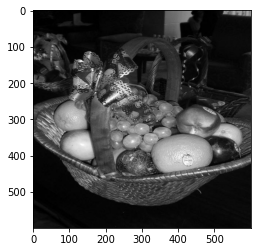

In [5]:
import random
plt.imshow(train_x[random.randint(0, 499)].squeeze())
plt.gray()

In [6]:
print(train_x.max(), train_x.min())
print(test_x.max(), test_x.min())

255.0 0.0
255.0 0.0


In [7]:
x_train = train_x.astype('float32') / 255.
x_test = test_x.astype('float32') / 255.

In [8]:
print(x_train.max(), train_x.min())
print(x_test.max(), test_x.min())

1.0 0.0
1.0 0.0


In [9]:
#x_train = x_train.squeeze()
#print(x_train.shape)
#x_test = x_test.squeeze()
#print(x_test.shape)
  

In [10]:
print(train_x.shape[1:])

(600, 600, 1)


In [15]:
#from tensorflow.keras.datasets import fashion_mnist
#(x_train, _), (x_test, _) = fashion_mnist.load_data()

#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.

#print (x_train.shape)
#print (x_test.shape)

In [12]:

def build_autoencoder(img_shape):
    # ENCODER
    encoder = tf.keras.Sequential()
    encoder.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    encoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    encoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    #middle-layer
    encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))

    decoder = tf.keras.Sequential()
    decoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
    decoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
    decoder.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
    decoder.add(tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    return encoder, decoder


img_shape = (600,600,1)

encoder, decoder = build_autoencoder(img_shape)
inp = tf.keras.layers.Input(img_shape)
code=encoder(inp)
reconstruction=decoder(code)


autoencoder = tf.keras.models.Model(inp, reconstruction)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MSE)

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 600, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 300, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 150, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 8)       584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 8)       

In [13]:
history = autoencoder.fit(x=x_train, y=x_train, batch_size=16, epochs=2, validation_data=[x_test, x_test])

Epoch 1/2
32/32 [==============================] - 294s 9s/step - loss: 0.0662 - val_loss: 0.0275
Epoch 2/2
32/32 [==============================] - 310s 10s/step - loss: 0.0162 - val_loss: 0.0124


In [59]:
#  2s 153ms/step - loss: 0.0070 - val_loss: 0.0521

# 16/16 [==============================] - 2s 141ms/step - loss: 0.0010 - val_loss: 0.0527

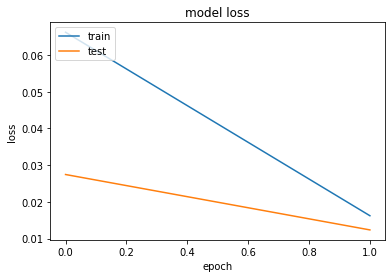

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 31s 4s/step


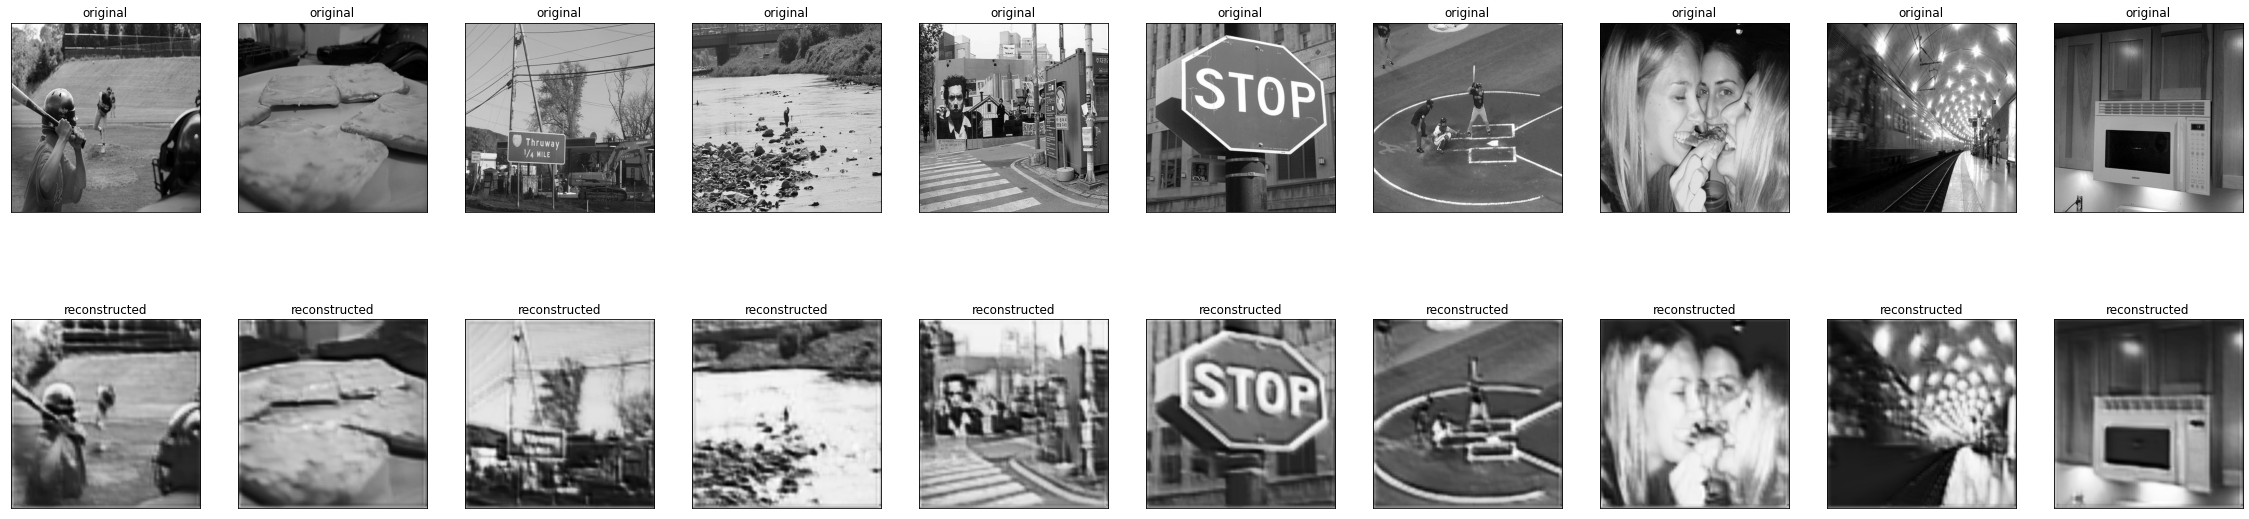

In [15]:
decoded_imgs = autoencoder.predict(x_test)


n = 10
plt.figure(figsize=(40, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].squeeze())
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].squeeze())
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [16]:

def build_autoencoder(img_shape):
    # ENCODER
    encoder = tf.keras.Sequential()
    encoder.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    encoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    encoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    #middle-layer
    encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))

    decoder = tf.keras.Sequential()
    decoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
    decoder.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
    decoder.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
    decoder.add(tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    return encoder, decoder

img_shape = (600,600,1)

encoder, decoder = build_autoencoder(img_shape)
inp = tf.keras.layers.Input(img_shape)
code=encoder(inp)
reconstruction=decoder(code)


autoencoder = tf.keras.models.Model(inp, reconstruction)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MSE)

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 600, 600, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 300, 300, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 300, 300, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 150, 150, 8)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 8)       584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 8)       

In [17]:
history = autoencoder.fit(x=x_train, y=x_train, batch_size=16, epochs=4)

Epoch 1/4
32/32 [==============================] - 253s 8s/step - loss: 0.0639
Epoch 2/4
32/32 [==============================] - 255s 8s/step - loss: 0.0223
Epoch 3/4
32/32 [==============================] - 252s 8s/step - loss: 0.0103
Epoch 4/4
32/32 [==============================] - 257s 8s/step - loss: 0.0094


8/8 [==============================] - 32s 4s/step


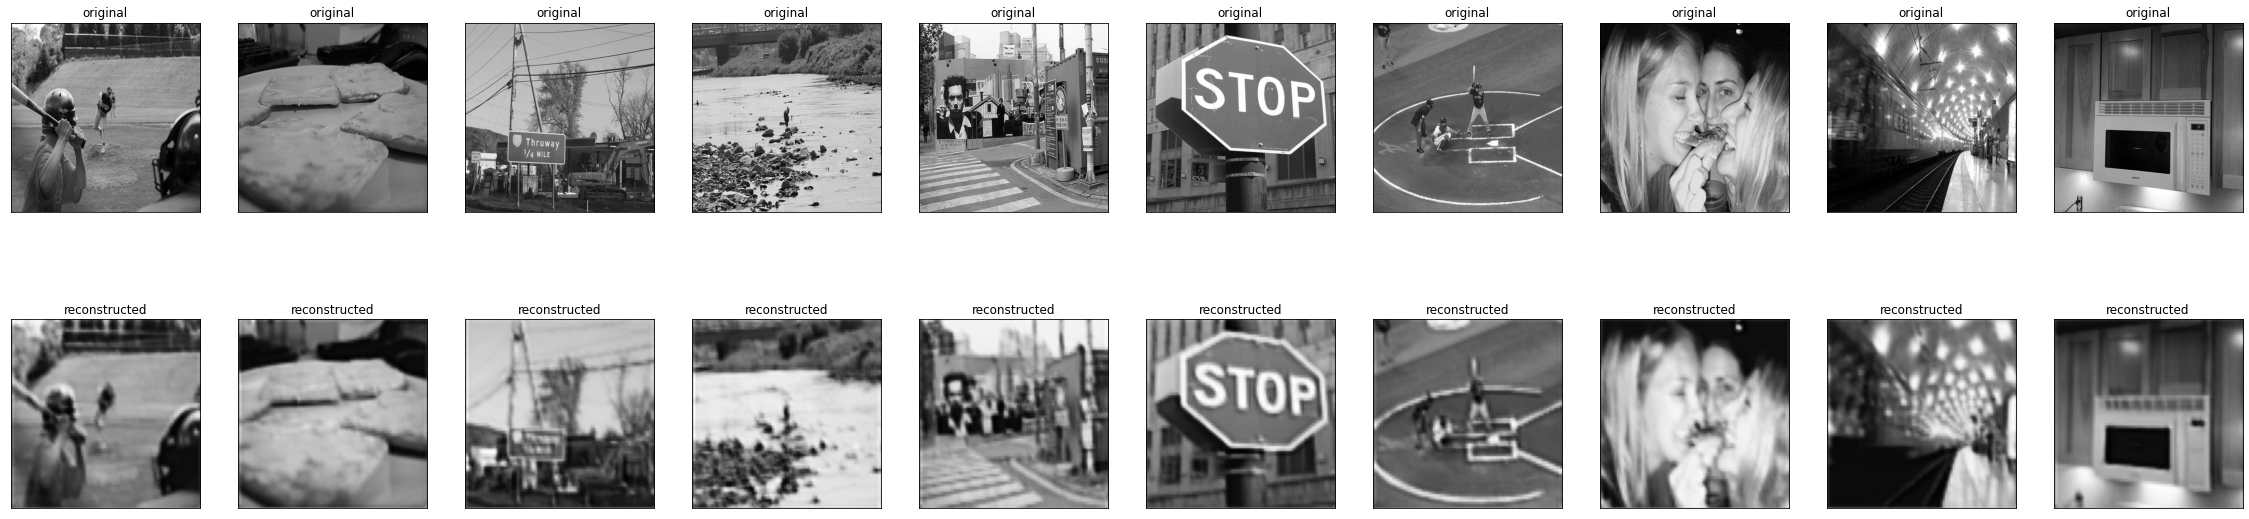

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(40, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].squeeze())
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].squeeze())
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()